In [1]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

The API allows you to query several keywords, but if one of them is a hundred times more popular then the other one gets a lot of zero values. There might be a way to do this in one go, but querying them separately ensures both are normalised to their maximum value of 100. 

In [97]:
keywords = ["roman numerals","super bowl"]

data = []

for keyword in keywords:
    kw_list =[keyword]
    pytrends.build_payload(kw_list, geo='US', timeframe='2004-01-01 2024-03-31') 
    data.append( pytrends.interest_over_time() )

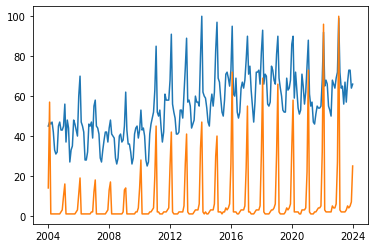

In [98]:
import matplotlib.pyplot as plt
for iii,keyword in enumerate(keywords):
    plt.plot(data[iii].index, data[iii][keyword])
plt.show()

Text(0, 0.5, 'search volume (in % of maximum)')

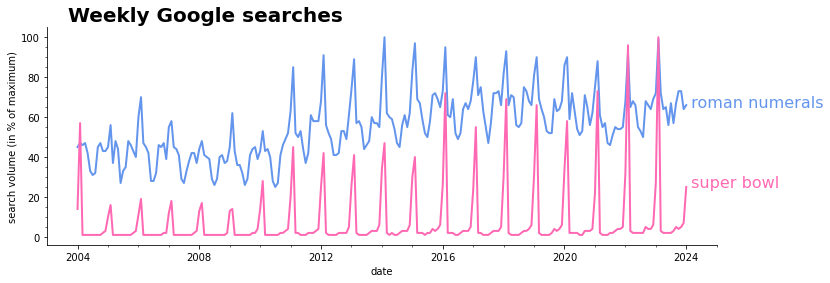

In [105]:
fig, ax = plt.subplots(figsize=(12,4))
fig.set_facecolor('white')
colors = ['cornflowerblue','hotpink']

## plot data
for iii,keyword in enumerate(keywords):
    plt.plot(data[iii].index, data[iii][keyword], lw=2, c=colors[iii])

# Remove some of the spins:
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
plt.minorticks_on()

# Add labels and title:
plt.title('   Weekly Google searches',loc='left',fontsize=20,fontweight='bold')
plt.text( data[0].index[-1] , 65 , ' roman numerals',fontsize=16,c='cornflowerblue')
plt.text( data[1].index[-1] , 25 , ' super bowl',fontsize=16,c='hotpink')

plt.xlabel('date')
plt.ylabel('search volume (in % of maximum)')